#  GOAL:CREDIT CARD FRAUD PREDICTION

STEPS:
* EXPLORATORY DATA ANALYSIS
* FIXING IMBALANCE 
* FEATURE SELECTION
* MODEL BUILDING

MODEL SUMMARY:
* LOGISTIC REGRESSION(ACCURACY-97% AND RECALL- 94%).
* NAIVE BAYES(ACCURACY-98 AND RECALL-92%)
* DECISION TREE(ACCURACY-99% AND RECALL-85%)
* HARD-VOTING-CLASSIFIER(ACCURACY-99% AND RECALL-84%)
* SOFT-VOTING-CLASSIFIER(ACCURACY-

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


DATA EXPLOATION


In [2]:
#Loading
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
#Examine first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#check stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#number of rows and columns
df.shape

(284807, 31)

In [7]:
#Check for nul values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Count of Fraudulent and normal transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

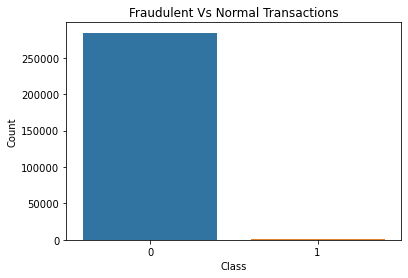

In [9]:
#Lets visualise it
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent Vs Normal Transactions')
plt.show()

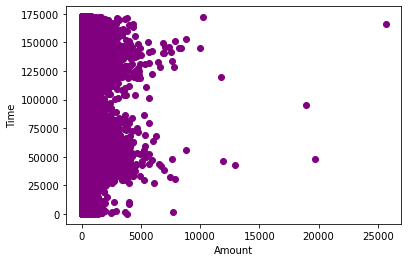

In [10]:
#reationship between time and amount
plt.scatter(df['Amount'],df['Time'],color='purple')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

In [11]:
#Amount spent by each class
pivot = df.pivot_table(index=['Class'], values=['Amount'], aggfunc='sum')
pivot

,Amount
Class,
0,2.510246e+07
1,6.012797e+04


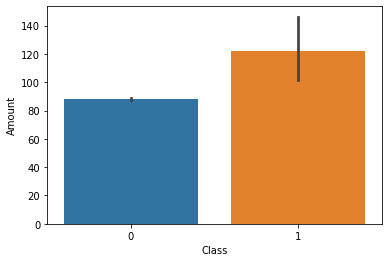

In [12]:
#Fraudulent transactions involve more money
sns.barplot(x=df['Class'],y=df['Amount'],data=df)
plt.show()

<AxesSubplot:>

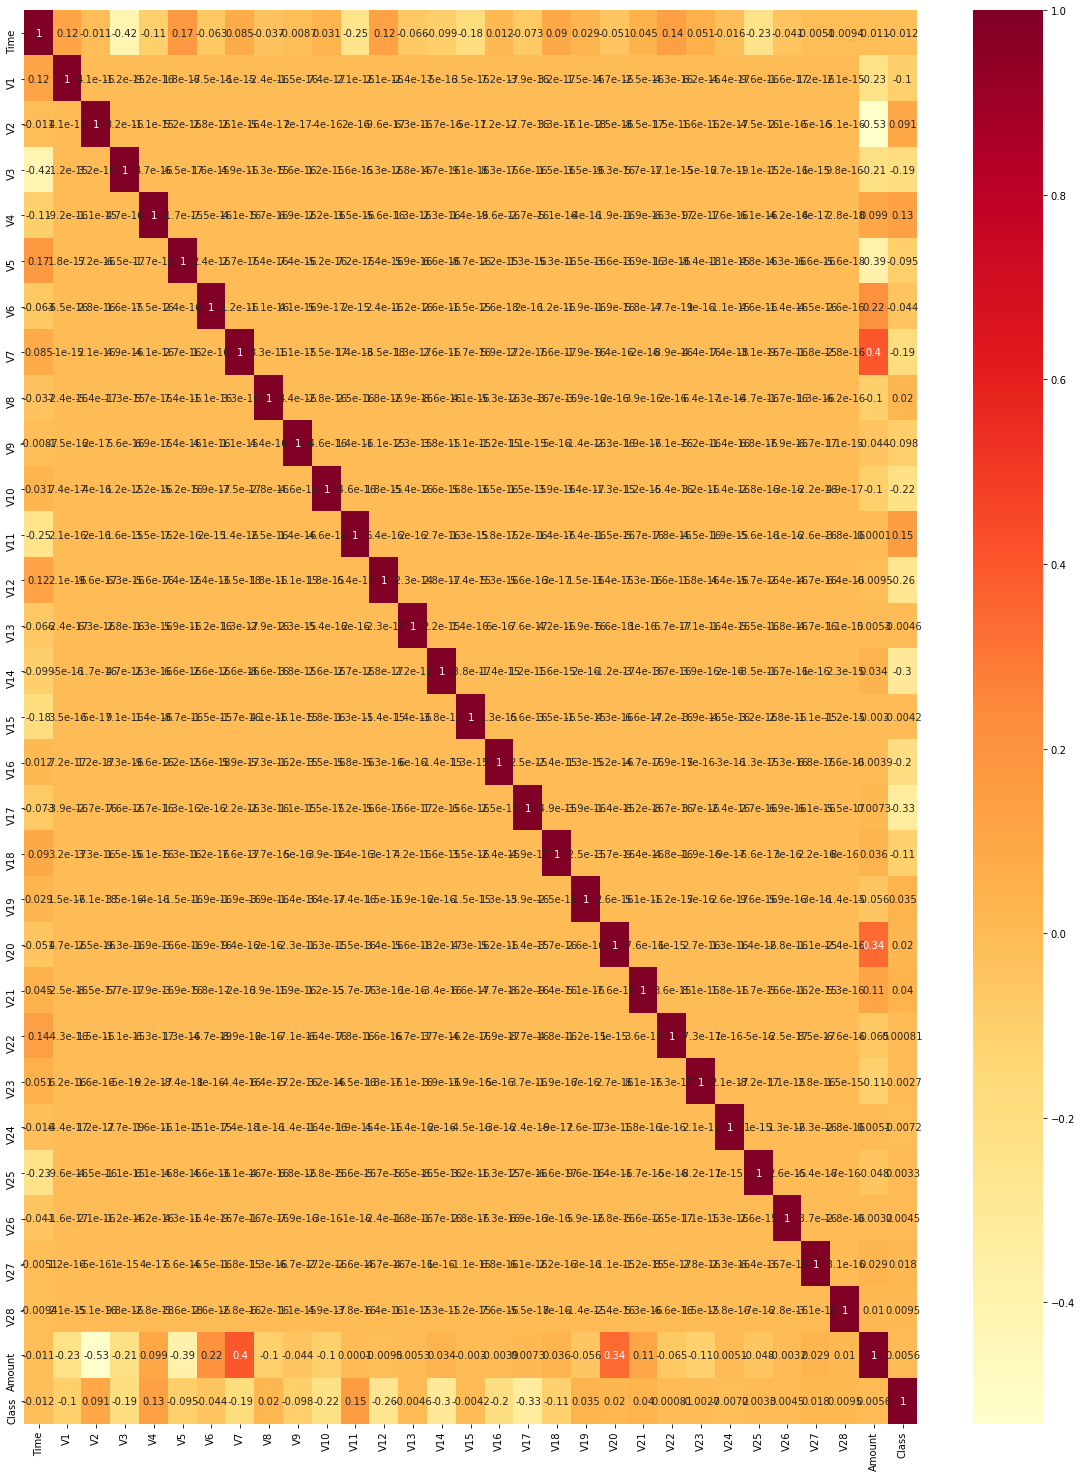

In [13]:
#lets check the correlations of all variables with the target
matrix_corr = df.corr().index
plt.figure(figsize=(20,26))
sns.heatmap(df[matrix_corr].corr(),annot=True,cmap='YlOrRd')

In [14]:
#lets get the x
x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]


In [15]:
#lets get the y
y = df['Class']

In [16]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# DEALING WITH IMBALANCED DATASET

In [17]:
#Count of Fraudulent and normal transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

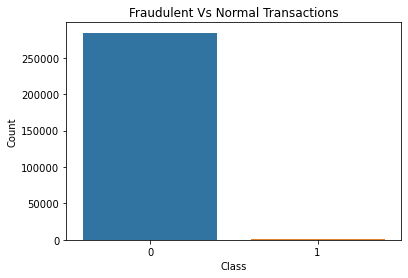

In [18]:
#Lets visualise it
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent Vs Normal Transactions')
plt.show()

In [19]:
#setting oversampler
oversamp=RandomOverSampler(1)

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [20]:
#fit oversample on data
x_train_os,y_train_os=oversamp.fit_sample(x_train,y_train)

# MODEL BUILDING

LOGISTIC REGRESSION

In [21]:
#instantiate logistic regression
log_classify = LogisticRegression(random_state=1)

In [22]:
#logistic reg hyperparameters
param_dict = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_model = GridSearchCV(log_classify, param_dict, cv=5, scoring='accuracy')

In [23]:
#fit to training data
log_model.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [24]:
#predict test
y_pred=log_model.predict(x_test)

In [25]:
#check the accuracy of the model
print(accuracy_score(y_test,y_pred))

0.9754924335521927


In [26]:
#check the recall and precisionof the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55491  1388]
 [    8    75]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56879
           1       0.05      0.90      0.10        83

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.98      0.99     56962



NAIVE BAYES MODEL

In [27]:
#instantiate naive bayes
clf = GaussianNB()

In [28]:
#fit the model
clf.fit(x_train_os,y_train_os)

GaussianNB()

In [29]:
#predict the test data
y_pred_n  = clf.predict(x_test)

In [30]:
#check the accuracy
print(accuracy_score(y_test,y_pred_n))

0.9830764369228608


In [31]:
#check for recall and precision
print(confusion_matrix(y_test,y_pred_n))
print(classification_report(y_test,y_pred_n))

[[55927   952]
 [   12    71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56879
           1       0.07      0.86      0.13        83

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



DECISION TREE MODEL

In [32]:
#set the decision tree
clf = tree.DecisionTreeClassifier(random_state=4)

In [33]:
#fit to training data
clf.fit(x_train_os,y_train_os)

DecisionTreeClassifier(random_state=4)

In [34]:
#predict the test data
y_pred_t = clf.predict(x_test)

In [35]:
#check the accuracy
print(accuracy_score(y_test,y_pred_t))

0.9992275552122467


In [36]:
#check for recall and precision
print(confusion_matrix(y_test,y_pred_t))
print(classification_report(y_test,y_pred_t))

[[56860    19]
 [   25    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.75      0.70      0.73        83

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
print("Precision = {}".format(precision_score(y_test, y_pred_t, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred_t, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred_t)))

Precision = 0.8764036350394793
Recall = 0.8492305691409602
Accuracy = 0.9992275552122467


ENSEMBLE:VOTING CLASSIFIERS

In [38]:
#hard voting
hard_vote = VotingClassifier(estimators=[ ('lr', log_model), ('nb', clf), ('dct', clf)], voting='hard')

In [39]:
#fit to training data
hard_vote.fit(x_train_os,y_train_os)

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=5,
                                           estimator=LogisticRegression(random_state=1),
                                           param_grid={'C': [0.1, 0.5, 1, 5, 10,
                                                             50, 100]},
                                           scoring='accuracy')),
                             ('nb', DecisionTreeClassifier(random_state=4)),
                             ('dct', DecisionTreeClassifier(random_state=4))])

In [40]:
#make predictions for the test set
y_pred_h = hard_vote.predict(x_test)

In [41]:
#check recall and precision
print(confusion_matrix(y_test,y_pred_h))
print(classification_report(y_test,y_pred_h))

[[56860    19]
 [   25    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.75      0.70      0.73        83

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
#soft vote
soft_vote = VotingClassifier(estimators=[ ('lr', log_model), ('nb', clf), ('dct', clf)], voting='soft')

In [43]:
#fit to training data
soft_vote.fit(x_train_os,y_train_os)

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=5,
                                           estimator=LogisticRegression(random_state=1),
                                           param_grid={'C': [0.1, 0.5, 1, 5, 10,
                                                             50, 100]},
                                           scoring='accuracy')),
                             ('nb', DecisionTreeClassifier(random_state=4)),
                             ('dct', DecisionTreeClassifier(random_state=4))],
                 voting='soft')

In [44]:
#predict the test
y_pred_s = soft_vote.predict(x_test)

In [45]:
print(confusion_matrix(y_test,y_pred_s))
print(classification_report(y_test,y_pred_s))

[[56860    19]
 [   25    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.75      0.70      0.73        83

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



# NOTE:MODEL WITH THE HIGHIEST RECALL WILL BE THE BEST MODEL ,SINCE WE ARE TRYING TO MININMIZE FALSE NEGATIVE(model predicting fruadulent transactions as normal)

# PLEASE LEAVE UR COMMENTS AND FEEDBACK